# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

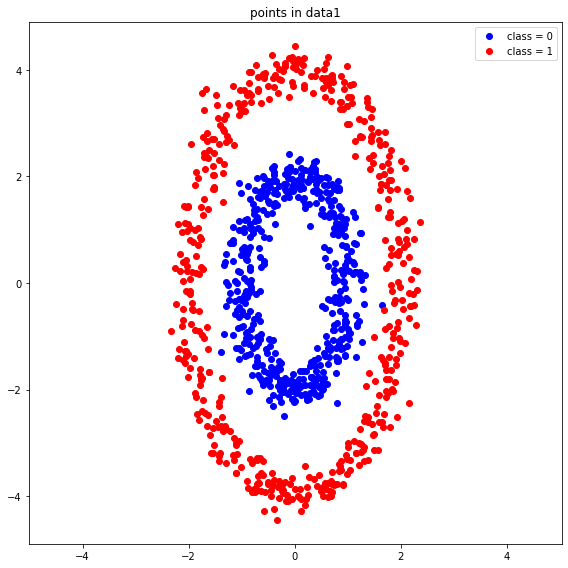

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

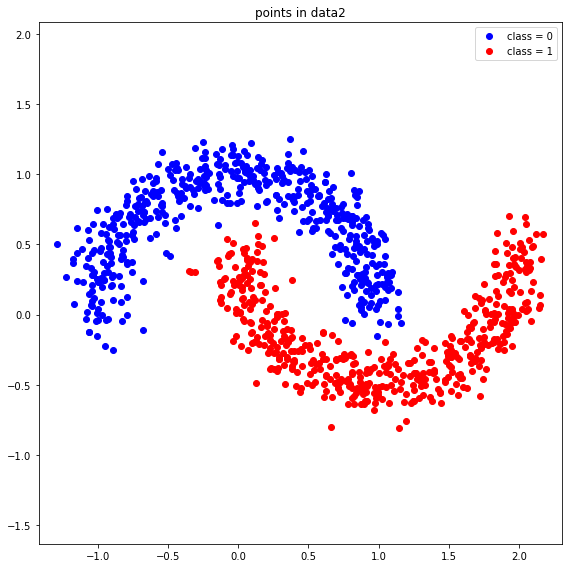

In [5]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [165]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # data1_point     = data1[:, 0:2]
    # data1_point     = data1[:, 0:2]
    # data1_point_x   = data1_point[:, 0]
    # data1_point_y   = data1_point[:, 1]
    data_x = point[:,0]
    data_y = point[:,1]
    n = len(data_x)
    ones = np.ones(n)
    #타원의 방정식 x*2 + x*2 + xy 
    feature_ = np.array([ones, data_x, data_y, data_x*data_x, data_x*data_y, data_y*data_y])
    feature = np.stack([ones, data_x, data_y, data_x*data_x, data_x*data_y, data_y*data_y],axis=0)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature

In [259]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #포물선의 경우 최고차항이 3차 polynomial 
    data_x = point[:,0]
    data_y = point[:,1]
    n = len(data_x)
    ones = np.ones(n)

    feature_ = np.array([ones,data_y,data_x,data_x*data_x,data_x*data_x*data_x])
    feature = np.stack([ones,data_y,data_x,data_x*data_x,data_x*data_x*data_x],axis=0)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [261]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.dot(theta,feature)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [262]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1 / (1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [263]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    linear_regression = compute_linear_regression(theta,feature)
    value = sigmoid(linear_regression)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [264]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    linear_regression = compute_linear_regression(theta,feature)
    logistic_regression = compute_logistic_regression(theta,feature)

    residual = label * np.log(logistic_regression) + (1-label)*np.log(1-logistic_regression)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [265]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(label)
    logistic_regression = compute_logistic_regression(theta,feature)
    residual = label * np.log(logistic_regression) + (1-label)*np.log(1-logistic_regression)
    loss = -(1/n) * np.sum(residual)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [266]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    logistic_regression = compute_logistic_regression(theta,feature)
    n = len(label)
    gradient = (1/n) * np.sum((logistic_regression-label)*feature,axis=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [267]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(label)
    logistic_regression = compute_logistic_regression(theta,feature)
    frequency = []

    for i in range(len(logistic_regression)):
        cur_logit = logistic_regression[i]
        if (cur_logit>=0.5):
            frequency.append(1)
        else:
            frequency.append(0)

    true_cnt =0 
    for index, logit in enumerate(frequency):
        if (logit == label[index]):
            true_cnt+=1
    
    accuracy = true_cnt / n
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [277]:
data1_number_iteration   = 30000
data2_number_iteration   = 30000 

data1_learning_rate   = 0.15
data2_learning_rate   = 0.15 

data1_number_feature    = 6
data2_number_feature    = 5 

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [278]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta1      = theta1 - data1_learning_rate * compute_gradient(theta1,compute_feature1(data1),data1_label)
    loss1       = compute_loss(theta1,compute_feature1(data1),data1_label)
    accuracy1   = compute_accuracy(theta1,compute_feature1(data1),data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1
print(data1_loss_iteration.max())
print(data1_accuracy_iteration.max())
acc1 = accuracy1

0.600176195996037
0.999


In [279]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta2      = theta2 - data2_learning_rate * compute_gradient(theta2,compute_feature2(data2),data2_label)
    loss2       = compute_loss(theta2,compute_feature2(data2),data2_label)
    accuracy2   = compute_accuracy(theta2,compute_feature2(data2),data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2
print(data2_loss_iteration.max())
print(data2_accuracy_iteration.max())
acc2 = accuracy2

0.6227491093229981
0.993


___

___

## functions for presenting the results

___

___

In [280]:
acc1 = compute_accuracy(data1_theta_optimal,compute_feature1(data1),data1_label)
acc2 = compute_accuracy(data2_theta_optimal,compute_feature2(data2),data2_label)

print(acc1)
print(acc2)

0.999
0.993


In [241]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [242]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [243]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [244]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [245]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [246]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [247]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [248]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [249]:
min_x   = np.min(data1_point_x)
max_x   = np.max(data1_point_x)
min_y   = np.min(data1_point_y)
max_y   = np.max(data1_point_y)

X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1)

[XX, YY] = np.meshgrid(X, Y)
XX = XX.reshape(XX.size)
YY = YY.reshape(YY.size)

print(XX.shape)
print(YY.shape)

inputs = np.stack([XX,YY],axis=1)
print(inputs.shape)

computed_feature1 = compute_feature1(inputs)
print(computed_feature1.shape)

ZZ = compute_linear_regression(data1_theta_optimal,computed_feature1)
print("ZZ shape :",ZZ.shape)

(5643,)
(5643,)
(5643, 2)
(6, 5643)
ZZ shape : (5643,)


In [250]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate
    # print("X :",X)
    # print("Y :",Y)
    # print("X length :",len(X))
    # print("Y length :",len(Y))
    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    shape = X.size
    x_shape = X.size 
    y_shape = Y.size

    XX = XX.reshape(XX.size)
    YY = YY.reshape(YY.size)
    inputs = np.stack([XX,YY],axis=1)
    computed_feature1 = compute_feature1(inputs)
    linear_regression = compute_linear_regression(data1_theta_optimal,computed_feature1)
    #print("ZZ shape :",ZZ.shape)
    XX = XX.reshape((y_shape,x_shape))
    YY = YY.reshape((y_shape,x_shape))
    linear_regression = linear_regression.reshape((y_shape,x_shape))
    ######################################
    

    n = len(data1)
    data_x = data1[:,0]
    data_y = data1[:,1]

    split_line = colors.TwoSlopeNorm(vmin=linear_regression.min(),vcenter=0,vmax = linear_regression.max()) 
    plt.contour(XX,YY,linear_regression,levels=[0],colors="black")
    cmap = plt.get_cmap('RdBu_r')
    plt.contourf(XX,YY,linear_regression,cmap=cmap, norm = split_line, levels = np.linspace(linear_regression.min(),linear_regression.max(),80))

    plt.colorbar()



    divided = int(n/2)
    ones = np.ones(divided)*10

    data1_x_in_blue = data_x[:divided]
    data1_y_in_blue = data_y[:divided]


    data1_x_in_red = data_x[divided:]
    data1_y_in_red = data_y[divided:]

    blue_label = ["BLUE"]*divided
    red_label = ["RED"]*divided

    plt.scatter(data1_x_in_blue,data1_y_in_blue,ones,blue_label,label="CLASS 0")
    plt.scatter(data1_x_in_red, data1_y_in_red,ones, red_label, label = "CLASS 1")

    axes = plt.gca()
    axes.set_xlim([-3,3])
    axes.set_ylim([-5,5])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

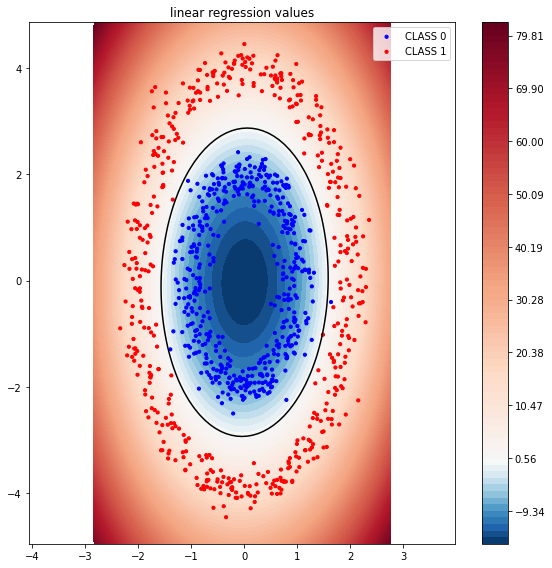

In [251]:
function_result_09()

In [252]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    shape = X.size
    x_shape = X.size 
    y_shape = Y.size
    # print("shape ",shape)
    # print("X.size :",X.size)
    # print("Y.size :",Y.size)
    # print("x_shape : ", x_shape)
    # print("y_shape :", y_shape)
    XX = XX.reshape(XX.size)
    YY = YY.reshape(YY.size)
    inputs = np.stack([XX,YY],axis=1)
    computed_feature2 = compute_feature2(inputs)
    linear_regression = compute_linear_regression(data2_theta_optimal,computed_feature2)
    #print("ZZ shape :",ZZ.shape)
    XX = XX.reshape((y_shape,x_shape))
    YY = YY.reshape((y_shape,x_shape))
    linear_regression = linear_regression.reshape((y_shape,x_shape))
    ######################################
    

    n = len(data2)
    data_x = data2[:,0]
    data_y = data2[:,1]

    split_line = colors.TwoSlopeNorm(vmin=linear_regression.min(),vcenter=0,vmax = linear_regression.max()) 
    plt.contour(XX,YY,linear_regression,levels=[0],colors="black")
    cmap = plt.get_cmap('RdBu_r')
    plt.contourf(XX,YY,linear_regression,cmap=cmap, norm = split_line, levels = np.linspace(linear_regression.min(),linear_regression.max(),80))

    plt.colorbar()



    divided = int(n/2)
    ones = np.ones(divided)*10

    data1_x_in_blue = data_x[:divided]
    data1_y_in_blue = data_y[:divided]


    data1_x_in_red = data_x[divided:]
    data1_y_in_red = data_y[divided:]

    blue_label = ["BLUE"]*divided
    red_label = ["RED"]*divided

    plt.scatter(data1_x_in_blue,data1_y_in_blue,ones,blue_label,label="CLASS 0")
    plt.scatter(data1_x_in_red, data1_y_in_red,ones, red_label, label = "CLASS 1")

    axes = plt.gca()
    axes.set_xlim([-3,3])
    axes.set_ylim([-5,5])


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

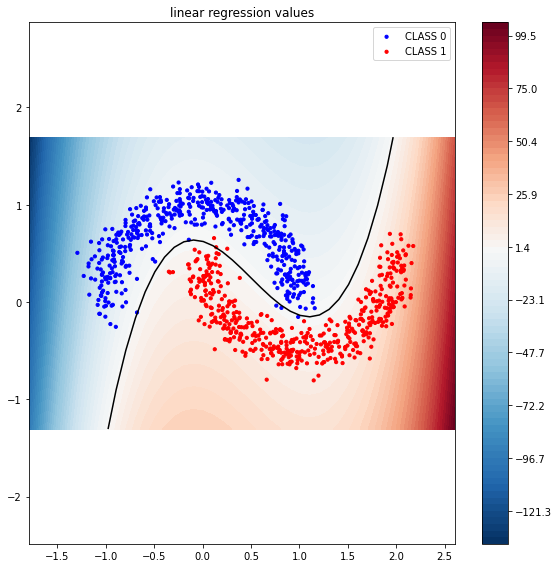

In [253]:
function_result_10()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [254]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    shape = X.size
    x_shape = X.size 
    y_shape = Y.size
    n = len(data1)
    # print("shape ",shape)
    # print("X.size :",X.size)
    # print("Y.size :",Y.size)
    # print("x_shape : ", x_shape)
    # print("y_shape :", y_shape)
    XX = XX.reshape(XX.size)
    YY = YY.reshape(YY.size)
    inputs = np.stack([XX,YY],axis=1)
    computed_feature1 = compute_feature1(inputs)
    logistic_regression = compute_logistic_regression(data1_theta_optimal,computed_feature1)
    #print("ZZ shape :",ZZ.shape)
    XX = XX.reshape((y_shape,x_shape))
    YY = YY.reshape((y_shape,x_shape))
    logistic_regression = logistic_regression.reshape((y_shape,x_shape))
    ######################################
    

    
    data_x = data1[:,0]
    data_y = data1[:,1]



    split_line = colors.TwoSlopeNorm(vmin=0,vcenter=logistic_regression.min(),vmax = logistic_regression.max()) 
    plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")
    cmap = plt.get_cmap('RdBu_r')
    #plt.contourf(XX,YY,ZZ,cmap=cmap, norm = split_line, levels = np.linspace(0,ZZ.max(),80))
    plt.contourf(XX,YY,logistic_regression,cmap=cmap,norm=split_line)
    plt.colorbar()



    divided = int(n/2)
    ones = np.ones(divided)*5

    data1_x_in_blue = data_x[:divided]
    data1_y_in_blue = data_y[:divided]


    data1_x_in_red = data_x[divided:]
    data1_y_in_red = data_y[divided:]

    blue_label = ["BLUE"]*divided
    red_label = ["RED"]*divided

    plt.scatter(data1_x_in_blue,data1_y_in_blue,ones,blue_label,label="CLASS 0")
    plt.scatter(data1_x_in_red, data1_y_in_red,ones, red_label, label = "CLASS 1")

    axes = plt.gca()
    axes.set_xlim([-3,3])
    axes.set_ylim([-5,5])   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10632\3583399535.py:47: UserWarning: No contour levels were found within the data range.
  plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")


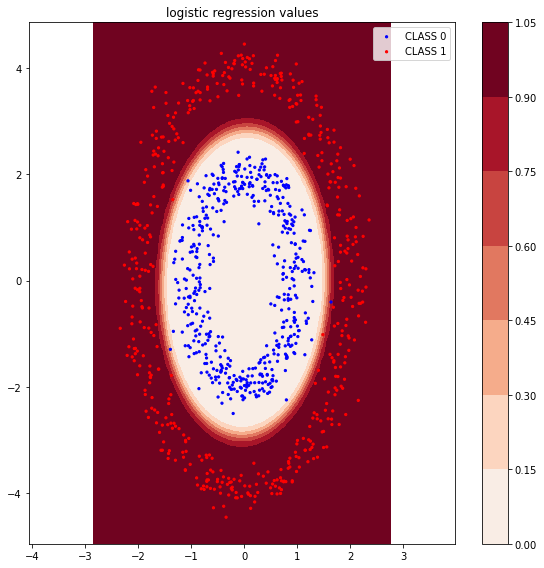

In [255]:
function_result_11()

In [256]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    shape = X.size
    x_shape = X.size 
    y_shape = Y.size
    # print("shape ",shape)
    # print("X.size :",X.size)
    # print("Y.size :",Y.size)
    # print("x_shape : ", x_shape)
    # print("y_shape :", y_shape)
    XX = XX.reshape(XX.size)
    YY = YY.reshape(YY.size)
    inputs = np.stack([XX,YY],axis=1)
    computed_feature2 = compute_feature2(inputs)
    logistic_regression = compute_logistic_regression(data2_theta_optimal,computed_feature2)
    
    XX = XX.reshape((y_shape,x_shape))
    YY = YY.reshape((y_shape,x_shape))
    logistic_regression = logistic_regression.reshape((y_shape,x_shape))
    ######################################
    

    n = len(data2)
    data_x = data2[:,0]
    data_y = data2[:,1]



    split_line = colors.TwoSlopeNorm(vmin=0,vcenter=logistic_regression.min(),vmax = logistic_regression.max()) 
    plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")
    cmap = plt.get_cmap('RdBu_r')
    #plt.contourf(XX,YY,ZZ,cmap=cmap, norm = split_line, levels = np.linspace(0,ZZ.max(),80))
    plt.contourf(XX,YY,logistic_regression,cmap=cmap,norm=split_line)
    plt.colorbar()



    divided = int(n/2)
    ones = np.ones(divided)*10

    data1_x_in_blue = data_x[:divided]
    data1_y_in_blue = data_y[:divided]


    data1_x_in_red = data_x[divided:]
    data1_y_in_red = data_y[divided:]

    blue_label = ["BLUE"]*divided
    red_label = ["RED"]*divided

    plt.scatter(data1_x_in_blue,data1_y_in_blue,ones,blue_label,label="CLASS 0")
    plt.scatter(data1_x_in_red, data1_y_in_red,ones, red_label, label = "CLASS 1")

    axes = plt.gca()
    axes.set_xlim([-3,3])
    axes.set_ylim([-5,5])  


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10632\755358917.py:46: UserWarning: No contour levels were found within the data range.
  plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")


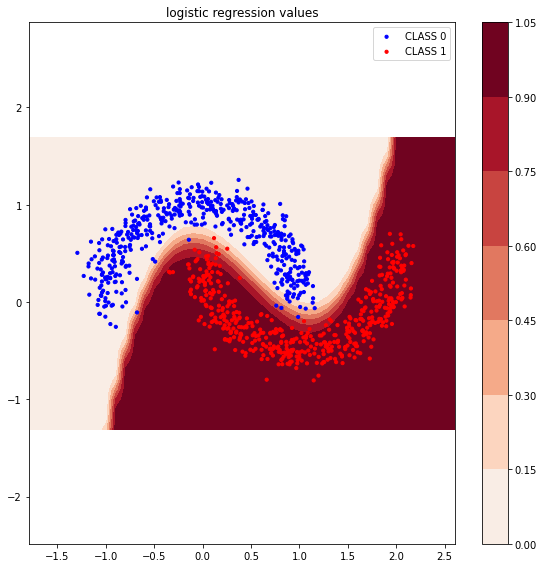

In [257]:
function_result_12()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.0050314194
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.0190214069
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9990000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9940000000
**************************************************
## [RESULT 05]
**************************************************


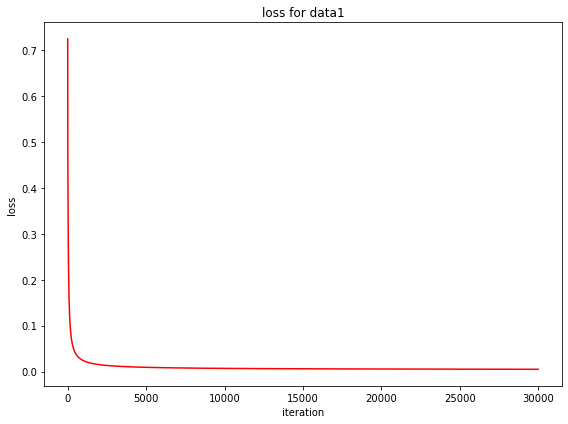

**************************************************
## [RESULT 06]
**************************************************


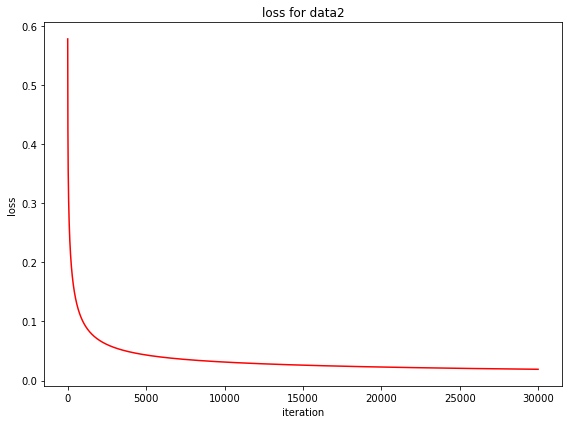

**************************************************
## [RESULT 07]
**************************************************


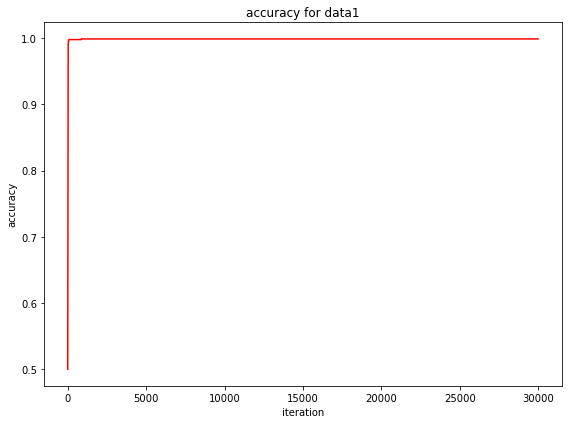

**************************************************
## [RESULT 08]
**************************************************


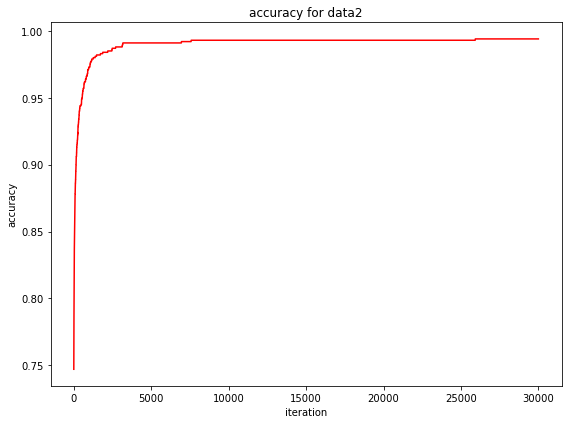

**************************************************
## [RESULT 09]
**************************************************


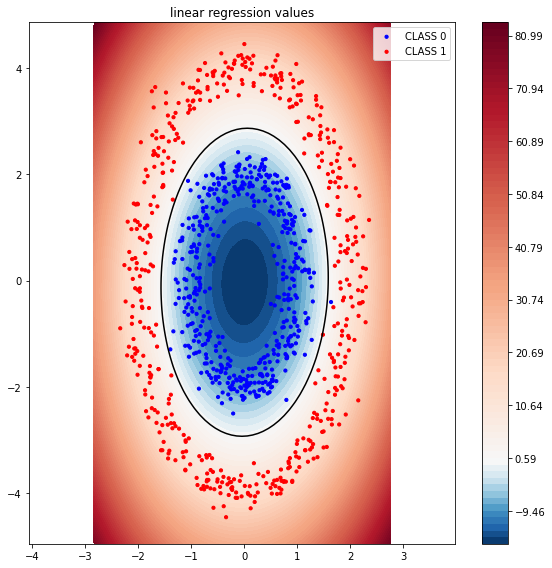

**************************************************
## [RESULT 10]
**************************************************


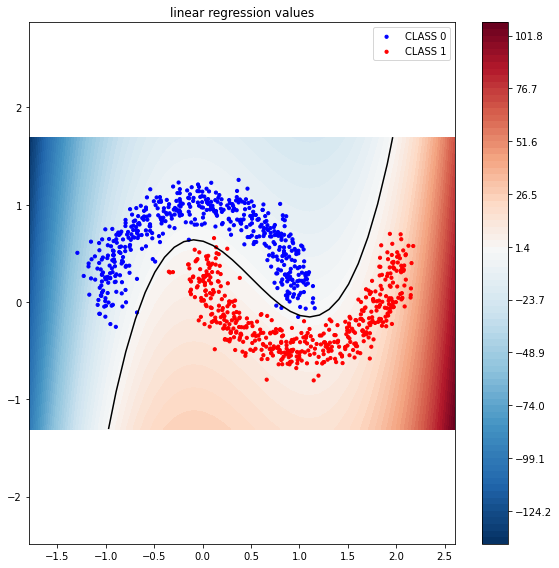

**************************************************
## [RESULT 11]
**************************************************


C:\Users\user\AppData\Local\Temp\ipykernel_10632\3583399535.py:47: UserWarning: No contour levels were found within the data range.
  plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")


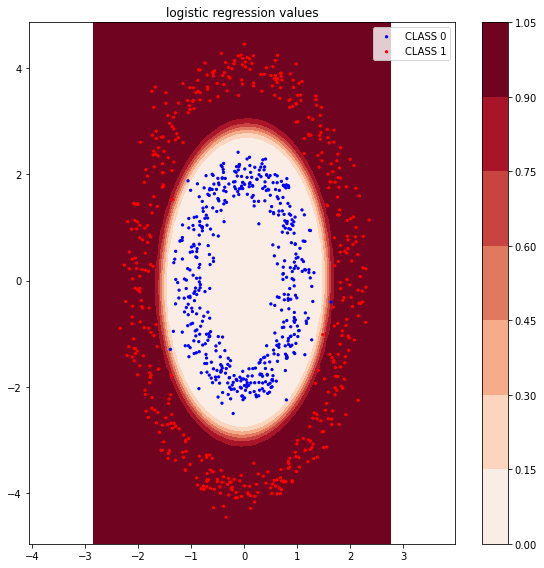

**************************************************
## [RESULT 12]
**************************************************


C:\Users\user\AppData\Local\Temp\ipykernel_10632\755358917.py:46: UserWarning: No contour levels were found within the data range.
  plt.contour(XX,YY,logistic_regression,levels=[0],colors="blue")


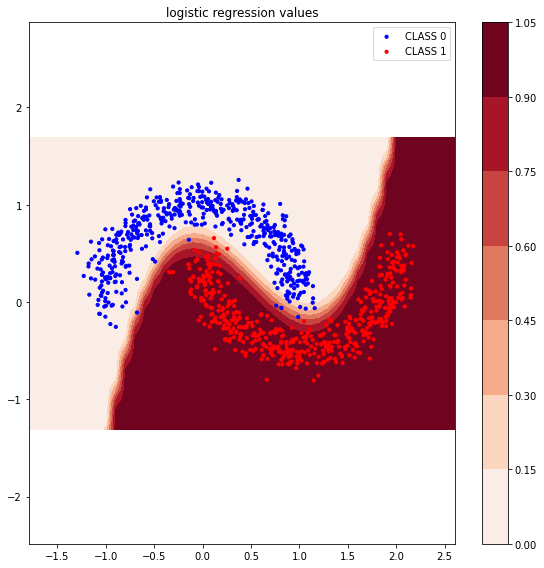

In [276]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)